In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

from itertools import product

### 4.2.a)

### 4.2.b)

$$Var(4X) = 4^2 Var(X) \rightarrow 4X \sim \mathcal{N}(0,4)$$

$$Var(Y) = Var(4X) + Var(N_y) \rightarrow P_Y^{\mathbb{M}} = \mathcal{N}(0, 16 + 1) = \mathcal{N}(0, 17)$$

### 4.2.c)

$$P_Y^{\mathbb{M}:do(X=2)} = \mathcal{N}(0 + 4*2, 1) = \mathcal{N}(8, 1)$$

### 4.2.d)

### 4.2.e)

$P(X,Y)$ is a bivariate normal distribution, so $P_\mathbb{M}(X|Y=2)$ (or $P_X^{\mathbb{M}:Y=2}$) is (see https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case_2)

correlation:

$$\mu_x=0, \mu_y=0, \sigma_x=1, \sigma_y=\sqrt{4^2 +1} $$

$$\rho = \frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x \sigma_y}$$

$$= \frac{E[(X-0)(4X+N_y-0)]}{\sigma_x \sigma_y}$$

$$= \frac{E[4X^2 + X N_y)]}{\sigma_x \sigma_y}$$

(because $X \bot N_Y$) $$= \frac{E[4X^2] + E[X] E[N_y]}{\sigma_x \sigma_y}$$ 

(1 degree of freedom because only one variable)

$$X^2 \sim \chi^2(1) \rightarrow E(4X^2) = 4*1 =4$$ 

$$\rightarrow \rho = \frac{4}{1 * \sqrt{17}}$$ 

$$P_X^{\mathbb{M}:Y=2} = \mathcal{N}\big(\mu_x + \frac{\sigma_x}{\sigma_y}\rho(2-\mu_y), (1-\rho^2)\sigma_x^2\big)$$

$$= \mathcal{N}\big(0 + \frac{\sigma_x}{\sigma_y}\rho(2-\mu_y), (1-\rho^2)\sigma_x^2\big)$$

$$= \mathcal{N}\big(\frac{1}{\sqrt{17}}\frac{4}{\sqrt{17}}(2-0), (1-(\frac{4}{\sqrt{17}})^2)*1\big)$$

$$= \mathcal{N}\big(\frac{4}{17}*2, (1-\frac{16}{17}))\big)$$
$$P_X^{\mathbb{M}:Y=2} = \mathcal{N}\big(\frac{8}{17}, \frac{1}{17}\big)$$

### 4.2.f)

$$P_X^{\mathbb{M}:do(Y=2)} = \mathcal{N}(0,1)$$

### 4.2.g)

In [2]:
def model():
    X = pyro.sample("X", dist.Normal(0.0, 1.0))
    Ny = pyro.sample("Ny", dist.Normal(0.0, 1.0))
    Y = 4*X + Ny
    Y = pyro.sample("Y", dist.Normal(Y, 0.01))

In [3]:
trace_handler = pyro.poutine.trace(model)

In [4]:
NUM_SAMPLES = 10
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    x = trace.nodes["X"]["value"].item()
    y = trace.nodes["Y"]["value"].item()
    sample = (x, y)
    l_samples.append(sample)

In [5]:
l_samples

[(-0.2593660354614258, 0.18044322729110718),
 (-0.23269769549369812, -1.549285650253296),
 (-0.2506776750087738, -2.138352632522583),
 (-0.22582589089870453, -0.390533983707428),
 (0.250608891248703, 1.9200994968414307),
 (0.030343862250447273, -1.193920373916626),
 (2.177656412124634, 8.775566101074219),
 (-2.2350215911865234, -8.805351257324219),
 (-0.4704291522502899, -1.717970848083496),
 (0.3804784119129181, 0.13829508423805237)]

### 4.2.h)

In [6]:
model_do = pyro.condition(model, data={"X": torch.tensor(2)})

In [7]:
trace_handler = pyro.poutine.trace(model_do)

In [8]:
NUM_SAMPLES = 100
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    y = trace.nodes["Y"]["value"].item()
    l_samples.append(y)

In [9]:
%matplotlib inline

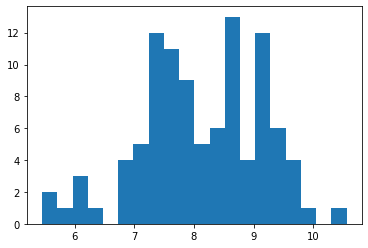

In [10]:
plt.hist(l_samples,bins=20);

### 4.2.i)

In [11]:
model_cond = pyro.condition(model, data={"Y": torch.tensor(2)})

In [12]:
trace_handler = pyro.poutine.trace(model_cond)

In [13]:
NUM_SAMPLES = 100
l_samples = []
for i in range(NUM_SAMPLES):
    trace = trace_handler.get_trace()
    x = trace.nodes["X"]["value"].item()
    y = trace.nodes["Y"]["value"].item()
    l_samples.append((x,y))

In [14]:
l_samples

[(0.8770524263381958, 2),
 (-0.8432202935218811, 2),
 (-0.7086594700813293, 2),
 (0.9794921875, 2),
 (0.942607045173645, 2),
 (-0.009752245619893074, 2),
 (0.07391933351755142, 2),
 (0.08065754920244217, 2),
 (1.835209846496582, 2),
 (-0.9123420715332031, 2),
 (-0.42892512679100037, 2),
 (0.7593942284584045, 2),
 (-1.0728734731674194, 2),
 (-1.8620394468307495, 2),
 (-1.2842390537261963, 2),
 (1.0959974527359009, 2),
 (0.036350734531879425, 2),
 (-0.25814318656921387, 2),
 (-0.7745528817176819, 2),
 (-0.590887725353241, 2),
 (0.5496968030929565, 2),
 (-0.4521237909793854, 2),
 (-0.18685869872570038, 2),
 (0.4347769021987915, 2),
 (-1.0263077020645142, 2),
 (0.7679622173309326, 2),
 (-0.46915367245674133, 2),
 (-0.08008336275815964, 2),
 (-0.7381357550621033, 2),
 (-0.2626643776893616, 2),
 (0.8092488050460815, 2),
 (0.15860702097415924, 2),
 (1.3754792213439941, 2),
 (0.6869575381278992, 2),
 (-1.0842359066009521, 2),
 (0.8150673508644104, 2),
 (-0.23161157965660095, 2),
 (-0.611258924

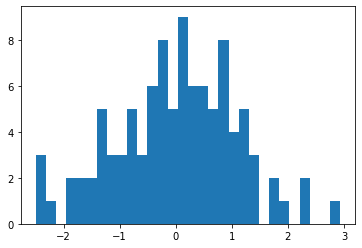

In [18]:
plt.hist([s[0] for s in l_samples], bins=30);

In [46]:
np.mean(l_samples)

1.0064335811999627

In [47]:
8/17

0.47058823529411764

In [134]:
imp_model_cond = pyro.infer.Importance(model_cond, num_samples=100000)

In [135]:
inf_model_cond = imp_model_cond.run()

In [101]:
type(inf_model_cond)

pyro.infer.importance.Importance

In [102]:
inf_samples = [tr.nodes["X"]["value"].item() for tr in inf_model_cond.exec_traces]

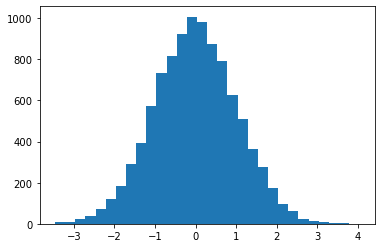

In [103]:
plt.hist(inf_samples, bins=30);

In [104]:
np.mean(inf_samples), 8/17, np.std(inf_samples), 1/17

(-0.007030339359781646,
 0.47058823529411764,
 1.0127494855684156,
 0.058823529411764705)

In [105]:
inf_model_cond.get_ESS()

tensor(29.4497)

In [123]:
emp_dist_model_cond = inf_model_cond.marginal(["X"]).empirical["X"]

In [133]:
emp_dist_model_cond.mean 

tensor(0.4513)

In [122]:
8

0.24253562503633297